# Projeto 2 - Ciência dos dados

**Integrantes:**
</p>

- Amanda Carmo

</p>

- Vitor Miada

In [437]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

In [438]:

dados_driver = pd.read_csv('drivers.csv')
dados_quali = pd.read_csv('quali.csv')
dados_result = pd.read_csv('results.csv')
dados_circuit = pd.read_csv('a.csv')
dados_race = pd.read_csv('b.csv')
dados_contresult = pd.read_csv('contresu.csv')
dados_escud = pd.read_csv('cont.csv')

In [439]:
#dados_driver.head()

In [440]:
#dados_quali.head()

In [441]:
dados_result
dados_result.head(30)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [442]:
dados_circuit.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [443]:
#dados_race.head(10)

In [444]:
#dados_escud.head()

In [445]:
#dados_contresult.head()

____
### Limpando os dados

O primeiro passo a ser feito é o tratamento dos datasets com o objetivo de se ter uma leitura mais limpa, focando-se naquilo que será analisado.

- dados do corredor:

In [446]:
dados_driver = dados_driver.drop(dados_driver.columns[[3, 4, 5, 6, 8]], axis=1) 

In [447]:
dados_driver.head()

,driverId,driverRef,number,nationality
0,1,hamilton,44,British
1,2,heidfeld,\N,German
2,3,rosberg,6,German
3,4,alonso,14,Spanish
4,5,kovalainen,\N,Finnish


.

- dados da qualificação:

In [448]:
dados_quali = dados_quali.drop(dados_quali.columns[[6, 7, 8]], axis=1) 

In [449]:
dados_quali.head()

,qualifyId,raceId,driverId,constructorId,number,position
0,1,18,1,1,22,1
1,2,18,9,2,4,2
2,3,18,5,1,23,3
3,4,18,13,6,2,4
4,5,18,2,2,3,5


.

- dados da escuderia:

In [450]:
dados_escud = dados_escud.drop(dados_escud.columns[[1, 4]], axis=1) 

.

- dados da corrida:

In [451]:
dados_race = dados_race.drop(dados_race.columns[[2, 5, 6, 7]], axis=1) 

In [452]:
dados_race.head()

,raceId,year,circuitId,name
0,1,2009,1,Australian Grand Prix
1,2,2009,2,Malaysian Grand Prix
2,3,2009,17,Chinese Grand Prix
3,4,2009,3,Bahrain Grand Prix
4,5,2009,4,Spanish Grand Prix


.

- dados do circuito:

In [453]:
dados_circuit = dados_circuit.drop(dados_circuit.columns[[1, 3, 5, 6, 7, 8]], axis=1) 

In [454]:
dados_circuit.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


.

- Resultados

Escuderia:

In [455]:
dados_contresult =  dados_contresult.drop(dados_contresult.columns[[5]], axis=1).sort_values(by=['raceId'])

In [456]:
dados_contresult.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
3666,4046,1,6,0.0,9,0
3667,4044,1,2,0.0,7,0
3668,4045,1,9,0.0,8,0
3669,4043,1,10,0.0,6,0
3670,4042,1,5,3.0,5,0


Geral:

In [457]:
pontos = dados_contresult.drop(columns = ['constructorStandingsId', 'position', 'constructorId', 'wins'])

In [458]:
pontos.head()

,raceId,points
3666,1,0.0
3667,1,0.0
3668,1,0.0
3669,1,0.0
3670,1,3.0


In [459]:
#dados_result.head(19)

In [460]:
dados_result =  dados_result.drop(dados_result.columns[[5, 7, 9, 10,11,12,13,15,16,17]], axis=1) 

In [461]:
dados_result.head(15)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
0,1,18,1,1,22,1,1,2
1,2,18,2,2,3,2,2,3
2,3,18,3,3,7,3,3,5
3,4,18,4,4,5,4,4,7
4,5,18,5,1,23,5,5,1
5,6,18,6,3,8,6,6,14
6,7,18,7,5,14,7,7,12
7,8,18,8,6,1,8,8,4
8,9,18,9,2,4,\N,9,9
9,10,18,10,7,12,\N,10,13


In [462]:
dados_results = dados_result.sort_values(by=['raceId'])

In [463]:
dados_results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
7572,7573,1,1,1,1,\N,20,13
7571,7572,1,5,1,2,\N,19,\N
7570,7571,1,6,3,17,\N,18,18
7569,7570,1,12,4,8,\N,17,19
7568,7569,1,13,6,3,\N,16,15


In [464]:
resultsi = dados_results.merge(dados_race, on = 'raceId', how = 'left')

In [465]:
resultsi.head(30).head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,year,circuitId,name
0,7573,1,1,1,1,\N,20,13,2009,1,Australian Grand Prix
1,7572,1,5,1,2,\N,19,\N,2009,1,Australian Grand Prix
2,7571,1,6,3,17,\N,18,18,2009,1,Australian Grand Prix
3,7570,1,12,4,8,\N,17,19,2009,1,Australian Grand Prix
4,7569,1,13,6,3,\N,16,15,2009,1,Australian Grand Prix


In [501]:
results = resultsi.drop(resultsi.columns[[8,10]], axis=1)

In [502]:
results.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId
0,7573,1,1,1,1,\N,20,13,1
1,7572,1,5,1,2,\N,19,\N,1
2,7571,1,6,3,17,\N,18,18,1
3,7570,1,12,4,8,\N,17,19,1
4,7569,1,13,6,3,\N,16,15,1


In [503]:
F_result = results.merge(pontos, on = 'raceId', how = 'left')

In [504]:
F_result.head()

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points
0,7573,1,1,1,1,\N,20,13,1,0.0
1,7573,1,1,1,1,\N,20,13,1,0.0
2,7573,1,1,1,1,\N,20,13,1,0.0
3,7573,1,1,1,1,\N,20,13,1,0.0
4,7573,1,1,1,1,\N,20,13,1,3.0


___
De modo a deixar a base de dados mais limpa, serão consideradas as oito primeiras posições:

In [505]:
dados = F_result[F_result['positionOrder'].map(int) < 8]

In [506]:
dados.head(3)

,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank,circuitId,points
90,7554,1,18,23,22,1,1,3,1,0.0
91,7554,1,18,23,22,1,1,3,1,0.0
92,7554,1,18,23,22,1,1,3,1,0.0


___

### ANALISE EXPLORATORIA


In [507]:
#taxa de vitoria da escuderia 
dados_taxa = pd.crosstab(dados_contresult['constructorId'],dados_contresult['position'], normalize = "index" )
dados_taxa.head()


position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.014286,0.342857,0.157143,0.000000,0.185714,0.114286,0.057143,0.128571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.152000,0.128000,0.134667,0.164000,0.086667,0.058667,0.058667,0.042667,0.061333,0.066667,...,0.001333,0.002667,0.001333,0.005333,0.010667,0.000000,0.0,0.0,0.0,0.0
4,0.118252,0.061697,0.120823,0.213368,0.167095,0.066838,0.077121,0.043702,0.051414,0.002571,...,0.010283,0.005141,0.017995,0.005141,0.017995,0.002571,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.003731,0.041045,0.164179,0.268657,0.205224,0.287313,0.029851,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [508]:
dados_taxa_filtrado = dados_taxa.sort_values(by=1).tail(11)
dados_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
constructorId,,,,,,,,,,,,,,,,,,,,,
1,0.200730,0.223844,0.149635,0.114355,0.082725,0.071776,0.034063,0.030414,0.043796,0.010949,...,0.001217,0.006083,0.001217,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
9,0.220280,0.171329,0.269231,0.076923,0.055944,0.094406,0.073427,0.034965,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
180,0.222222,0.240741,0.111111,0.074074,0.111111,0.018519,0.018519,0.000000,0.000000,0.000000,...,0.018519,0.166667,0.018519,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
170,0.224719,0.044944,0.123596,0.213483,0.157303,0.011236,0.000000,0.033708,0.056180,0.000000,...,0.000000,0.011236,0.056180,0.0,0.05618,0.0,0.0,0.0,0.0,0.0
87,0.235294,0.058824,0.352941,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [509]:
dados_taxa_filtrado1 = dados_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

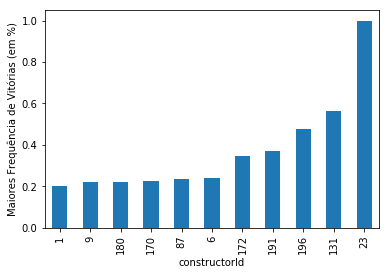

In [510]:
dados_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

In [511]:
#taxa de vitoria de cada corredor
dados_quali[["driverId", "position"]].head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


In [512]:
corredor_taxa = pd.crosstab(dados_quali['driverId'],dados_quali['position'], normalize = "index" )

In [513]:
corredor_taxa_filtrado = corredor_taxa.sort_values(by=1).tail(11)
corredor_taxa_filtrado.head()

position,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
driverId,,,,,,,,,,,,,,,,,,,,,
35,0.084337,0.036145,0.072289,0.036145,0.012048,0.036145,0.024096,0.048193,0.096386,0.060241,...,0.000000,0.0,0.012048,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,0.086957,0.043478,0.130435,0.217391,0.152174,0.043478,0.086957,0.065217,0.000000,0.021739,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
844,0.142857,0.047619,0.071429,0.119048,0.047619,0.000000,0.023810,0.071429,0.119048,0.023810,...,0.047619,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.145631,0.145631,0.048544,0.038835,0.067961,0.087379,0.097087,0.038835,0.067961,0.038835,...,0.004854,0.0,0.000000,0.0,0.004854,0.000000,0.0,0.0,0.0,0.0
57,0.161290,0.016129,0.129032,0.080645,0.080645,0.048387,0.112903,0.177419,0.096774,0.032258,...,0.000000,0.0,0.000000,0.0,0.000000,0.016129,0.0,0.0,0.0,0.0


In [514]:
corredor_taxa_filtrado1 = corredor_taxa_filtrado.loc[:,[1]].head(11)

Text(0, 0.5, 'Maiores Frequência de Vitórias (em %)')

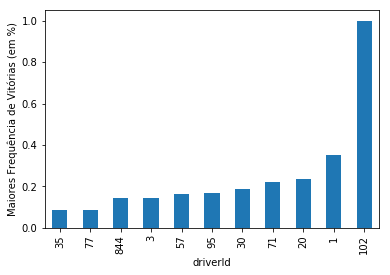

In [515]:
corredor_taxa_filtrado1.plot(kind='bar', legend=False)
plt.ylabel("Maiores Frequência de Vitórias (em %)")

___

## Técnicas de análise: variáveis qualitativas

## Random forest

Esta técnica utilizada pelo grupo se baseia, como sugerido pelo seu nome, em um conjunto de árvores de decisões, assim, com várias ramificações, possibilidades. Cada uma dessas árvores trabalha de forma individual de modo a gerar uma possível predição. O resultado obtido no classificador será validado conforme a predição predominante entre as árvores.

A primeira coisa feita foi separar, com base no dataframe, chamado "dados", separá-lo a fim de se ter uma parte para o treino e uma para os testes.

In [ ]:
msk = np.random.rand(len(dados)) < 0.8

In [ ]:
train = dados[msk]

In [ ]:
train.head()

In [ ]:
test = dados[~msk]

In [ ]:
y_train = train['positionOrder']
x_train = train.drop(columns = ['positionOrder', 'position'])

In [ ]:
y_test = test['positionOrder']
x_test = test.drop(columns=['positionOrder', 'position'])

In [ ]:
y_test.dtype

In [ ]:
plt.scatter(x_test.points, y_test)

In [ ]:
x_train.points.corr(y_train)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

O encoder usado acima possibilita conversão de variáveis categóricas em qualitativas. A partir disso, implementa-se o modelo Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train_encoded, y_train) #treina o modelo

#### realização dos testes:

A priori, testa-se a **acurácia** do modelo, depois, ele é **testado**

In [ ]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [ ]:
y_predict = model.predict(x_test_encoded)

In [ ]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

In [ ]:
acc_RandomForestClassifier

Substituindo predições no dataset de teste:

In [ ]:
test['PositionPredict'] = y_predict

In [ ]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [ ]:
y_predict_proba

In [ ]:
test['bPredictProba'] = y_predict_proba[:,1]

In [ ]:
test.sort_values(by='bPredictProba')[['driverId', 'constructorId', 'raceId', 'circuitId', 'positionOrder', 'PositionPredict']].head(20)